<a href="https://colab.research.google.com/github/NguyenKimLong-20146222/AI-sang-thu-7/blob/main/AI_W4_Fuzzy_Cooker_25_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


45.0


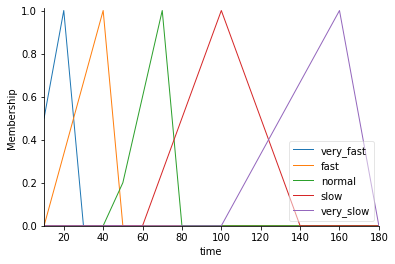

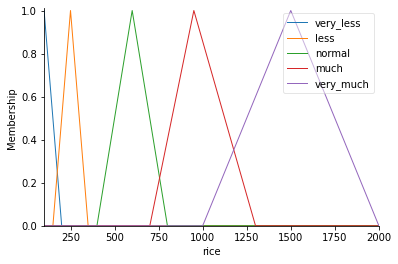

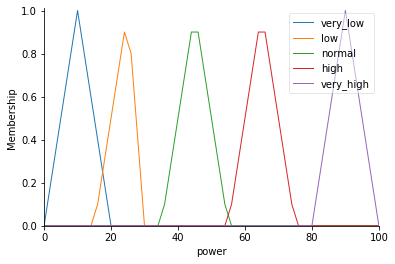

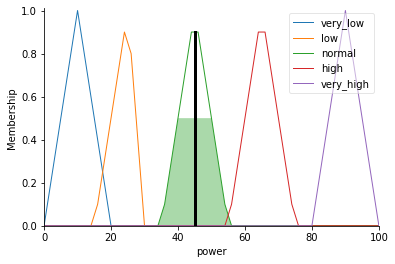

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time=ctrl.Antecedent(np.arange(10,181,10),'time')
rice=ctrl.Antecedent(np.arange(100,2001,50),'rice')
power=ctrl.Consequent(np.arange(0,101,2),'power')

time['very_fast']=fuzz.trimf(time.universe, [0,20,30])
time['fast']=fuzz.trimf(time.universe, [10,40,50])
time['normal']=fuzz.trimf(time.universe,[45,70,80])
time['slow']=fuzz.trimf(time.universe,[60,100,140])
time['very_slow']=fuzz.trimf(time.universe,[100,160,180])

rice['very_less']=fuzz.trimf(rice.universe, [0,100,200])
rice['less']=fuzz.trimf(rice.universe, [150,250,350])
rice['normal']=fuzz.trimf(rice.universe,[400,600,800])
rice['much']=fuzz.trimf(rice.universe,[700,950,1300])
rice['very_much']=fuzz.trimf(rice.universe,[1000,1500,2000])

power['very_low']=fuzz.trimf(power.universe, [0,10,20])
power['low']=fuzz.trimf(power.universe, [15,25,30])
power['normal']=fuzz.trimf(power.universe,[35,45,55])
power['high']=fuzz.trimf(power.universe,[55,65,75])
power['very_high']=fuzz.trimf(power.universe,[80,90,100])

time.view()
rice.view()
power.view()


rule1=ctrl.Rule(time['very_fast'] & rice['very_less'],power['high'])
rule2=ctrl.Rule(time['very_fast'] & rice['less'],power['high'])
rule3=ctrl.Rule(time['very_fast'] & rice['normal'],power['high'])
rule4=ctrl.Rule(time['very_fast'] & rice['much'],power['very_high'])
rule5=ctrl.Rule(time['very_fast'] & rice['very_much'],power['very_high'])

rule6=ctrl.Rule(time['fast'] & rice['very_less'],power['low'])
rule7=ctrl.Rule(time['fast'] & rice['less'],power['low'])
rule8=ctrl.Rule(time['fast'] & rice['normal'],power['normal'])
rule9=ctrl.Rule(time['fast'] & rice['much'],power['high'])
rule10=ctrl.Rule(time['fast'] & rice['very_much'],power['very_high'])

rule11=ctrl.Rule(time['normal'] & rice['very_less'],power['low'])
rule12=ctrl.Rule(time['normal'] & rice['less'],power['low'])
rule13=ctrl.Rule(time['normal'] & rice['normal'],power['normal'])
rule14=ctrl.Rule(time['normal'] & rice['much'],power['high'])
rule15=ctrl.Rule(time['normal'] & rice['very_much'],power['high'])

rule16=ctrl.Rule(time['slow'] & rice['very_less'],power['low'])
rule17=ctrl.Rule(time['slow'] & rice['less'],power['low'])
rule18=ctrl.Rule(time['slow'] & rice['normal'],power['normal'])
rule19=ctrl.Rule(time['slow'] & rice['much'],power['high'])
rule20=ctrl.Rule(time['slow'] & rice['very_much'],power['high'])

rule21=ctrl.Rule(time['very_slow'] & rice['very_less'],power['very_low'])
rule22=ctrl.Rule(time['very_slow'] & rice['less'],power['very_low'])
rule23=ctrl.Rule(time['very_slow'] & rice['normal'],power['normal'])
rule24=ctrl.Rule(time['very_slow'] & rice['much'],power['normal'])
rule25=ctrl.Rule(time['very_slow'] & rice['very_much'],power['normal'])


tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,
                                 rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['time']=60
tipping.input['rice']=500
tipping.compute()
print(tipping.output['power'])
power.view(sim=tipping)

